<div style="background-color: #ddefdd; padding: 40px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 48px; font-weight: bold;">🏦 CREDIT RISK PREDICTION NOTEBOOK </h1>
    <p style="font-size: 24px; font-weight: bold; margin-top: 20px;"></p>
    <img src="http://media2.giphy.com/media/3o6MbqeA01e9HsNV8k/giphy.gif" alt="GIF" style="width: 400px; margin: 20px auto;">
</div>


 
 <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<!-- Bank Money Theme -->
<div style="border-radius: 0px; border: 2px solid #3eb489; padding: 15px; background-color: #ddefdd; font-size: 120%; text-align: center; color: #007d3c; font-weight: bold;">
   Table of Contents
</div>


* [1. 💾 Import Libraries](#1.-Import-Libraries) 

* [2. 📑 Read and Explain Dataset](#2.-Read-and-Explain-Dataset)

* [3. 📊 Exploratory Data Analysis](#3.-Exploratory-Data-Analysis) 

* [4. 🎯 Dealing with Outliers](#4.-Dealing-with-Outliers)

* [5. 💡 Feature Engineering](#5.-Feature-Engineering)

* [6. 🛠️ Data Preprocessing](#6.-Data-Preprocessing)

* [7. 🌴 ML Classification Models](#7.-ML-Classification-Models)

* [8. ⚙️ Hyperparameter Tuning](#8.-Hyperparameter-Tuning)

* [9. 🚀 Training Final Model](#9.-Training-Final-Model)

* [10. 🤖 Auto ML using PyCaret](#10.-Auto-ML-using-PyCaret)

* [11. 🤖 Auto ML using AutoGluon](#11.-Auto-ML-using-AutoGluon)

* [12. 📝 Author's Message](#12.-Author's-Message)




## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">1. Import Libraries</div>

In [2]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import kagglehub

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")



## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">2. Read and Explain Dataset</div>

In [3]:
#Read data
path = kagglehub.dataset_download("laotse/credit-risk-dataset")
data = pd.read_csv(os.path.join(path, 'credit_risk_dataset.csv'))

# Print sample
data.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#daefdd','color': 'black','border-color': '#8b8c8c'})

<div style="background-color: #ddefdd; padding: 10px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Feature Descriptions</h1>
</div>

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
    <ul>
        <li><b>person_age:</b> Age of the individual applying for the loan.</li>
        <li><b>person_income:</b> Annual income of the individual.</li>
        <li><b>person_home_ownership:</b> Type of home ownership of the individual.
            <ul>
                <li>rent: The individual is currently renting a property.</li>
                <li>mortgage: The individual has a mortgage on the property they own.</li>
                <li>own: The individual owns their home outright.</li>
                <li>other: Other categories of home ownership that may be specific to the dataset.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Employment length of the individual in years.</li>
        <li><b>loan_intent:</b> The intent behind the loan application.</li>
        <li><b>loan_grade:</b> The grade assigned to the loan based on the creditworthiness of the borrower.
            <ul>
                <li>A: The borrower has a high creditworthiness, indicating low risk.</li>
                <li>B: The borrower is relatively low-risk, but not as creditworthy as Grade A.</li>
                <li>C: The borrower's creditworthiness is moderate.</li>
                <li>D: The borrower is considered to have higher risk compared to previous grades.</li>
                <li>E: The borrower's creditworthiness is lower, indicating a higher risk.</li>
                <li>F: The borrower poses a significant credit risk.</li>
                <li>G: The borrower's creditworthiness is the lowest, signifying the highest risk.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b> The loan amount requested by the individual.</li>
        <li><b>loan_int_rate:</b> The interest rate associated with the loan.</li>
        <li><b>loan_status:</b> Loan status, where 0 indicates non-default and 1 indicates default.
            <ul>
                <li>0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.</li>
                <li>1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b> The percentage of income represented by the loan amount.</li>
        <li><b>cb_person_default_on_file:</b> Historical default of the individual as per credit bureau records.
            <ul>
                <li>Y: The individual has a history of defaults on their credit file.</li>
                <li>N: The individual does not have any history of defaults.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b> The length of credit history for the individual.</li>
    </ul>
</div>


## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">3. Exploratory Data Analysis</div>

In [4]:
data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [5]:
data.tail()

person_age  person_income person_home_ownership  person_emp_length  \
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30

In [6]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [10]:
data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [11]:
data.duplicated().sum()

165

In [14]:
data.select_dtypes(include=[np.number]).corr()

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt                    1.000000       0.146813     0.105376   
loan_int_rate                0.146813       1.000000     0.335133   
loan_status                  0.105376       0.335133     1.000000   
loan_percent_income          0.572612       0.120314     0.379366   
cb_person_cred_hist_length   0.041967       0.016696    -0.015529   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                            -0.042411                    0.859133  
person_income                         -0.254471                    0.117987  
person_emp_length                     -0.054111                    0.144699  
loan_amnt                              0.572612                    0.041967  
loan_int_rate                          0.120314                    0.016696  
loan_status                            0.379366                   -0.015529  
loan_percent_income                    1.000000                   -0.031690  
cb_person_cred_hist_length            -0.031690                    1.000000

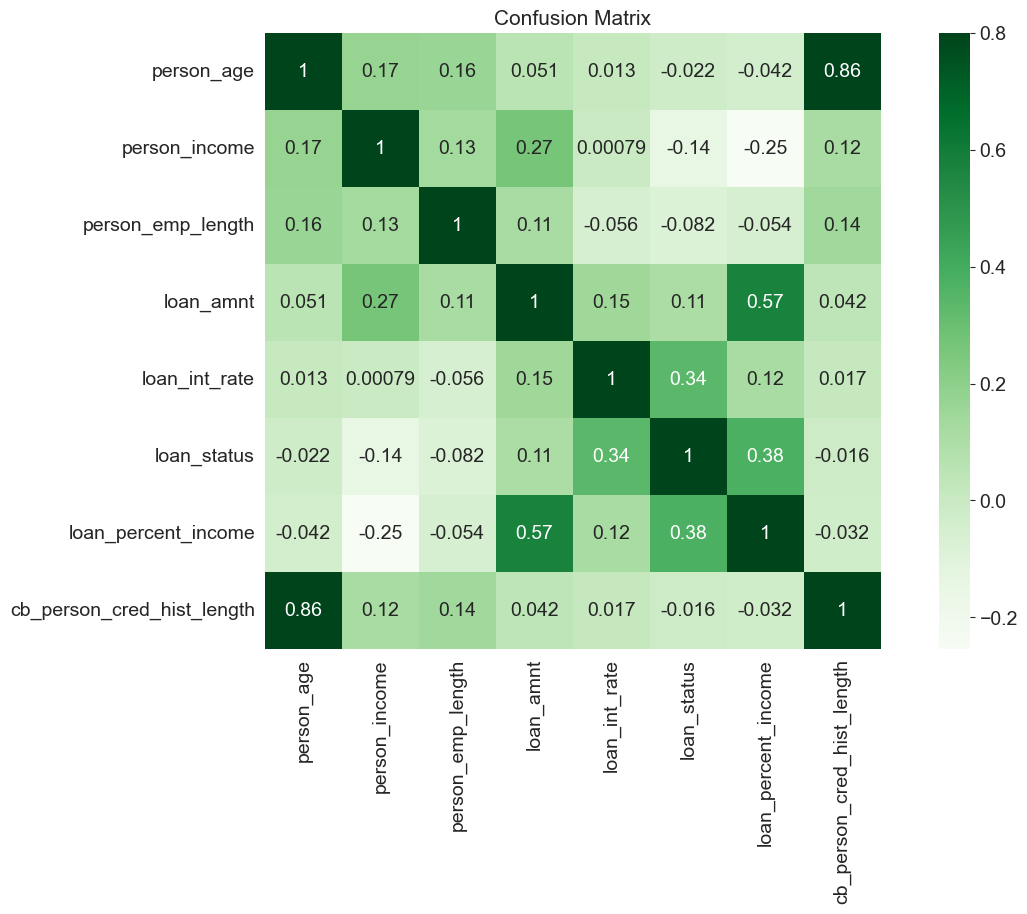

In [16]:
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(data.select_dtypes(include=['number']).corr(), vmax=.8, square=True, annot=True, cmap='Greens')
plt.title('Confusion Matrix',fontsize=15);

In [17]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:#ddefdd;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')
    

In [18]:
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in {'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'}}

multi_table([nunique_df['person_age'],nunique_df['person_income'],nunique_df['person_home_ownership'],nunique_df['person_emp_length'],nunique_df['loan_intent'],nunique_df['loan_grade'],nunique_df['loan_amnt'],nunique_df['loan_int_rate'],nunique_df['loan_status'],nunique_df['loan_percent_income'],nunique_df['cb_person_default_on_file'],nunique_df['cb_person_cred_hist_length']])

## Univarient Analysis

In [19]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

 


maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98


In [20]:
#max and min income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])


maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


In [21]:
#min and max loan amount
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])


maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


In [22]:
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**Observations: Most of the People taking a loan doesnt own their own house**


In [23]:
level_counts=data.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**Observations: Loan Grade A and B comprises of 65.2% of total**

In [24]:
fig=px.histogram(data, x = 'loan_intent',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = 'loan intent',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

**Observations:Loan Intent are equally almost distributed**

In [25]:
fig=px.histogram(data, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

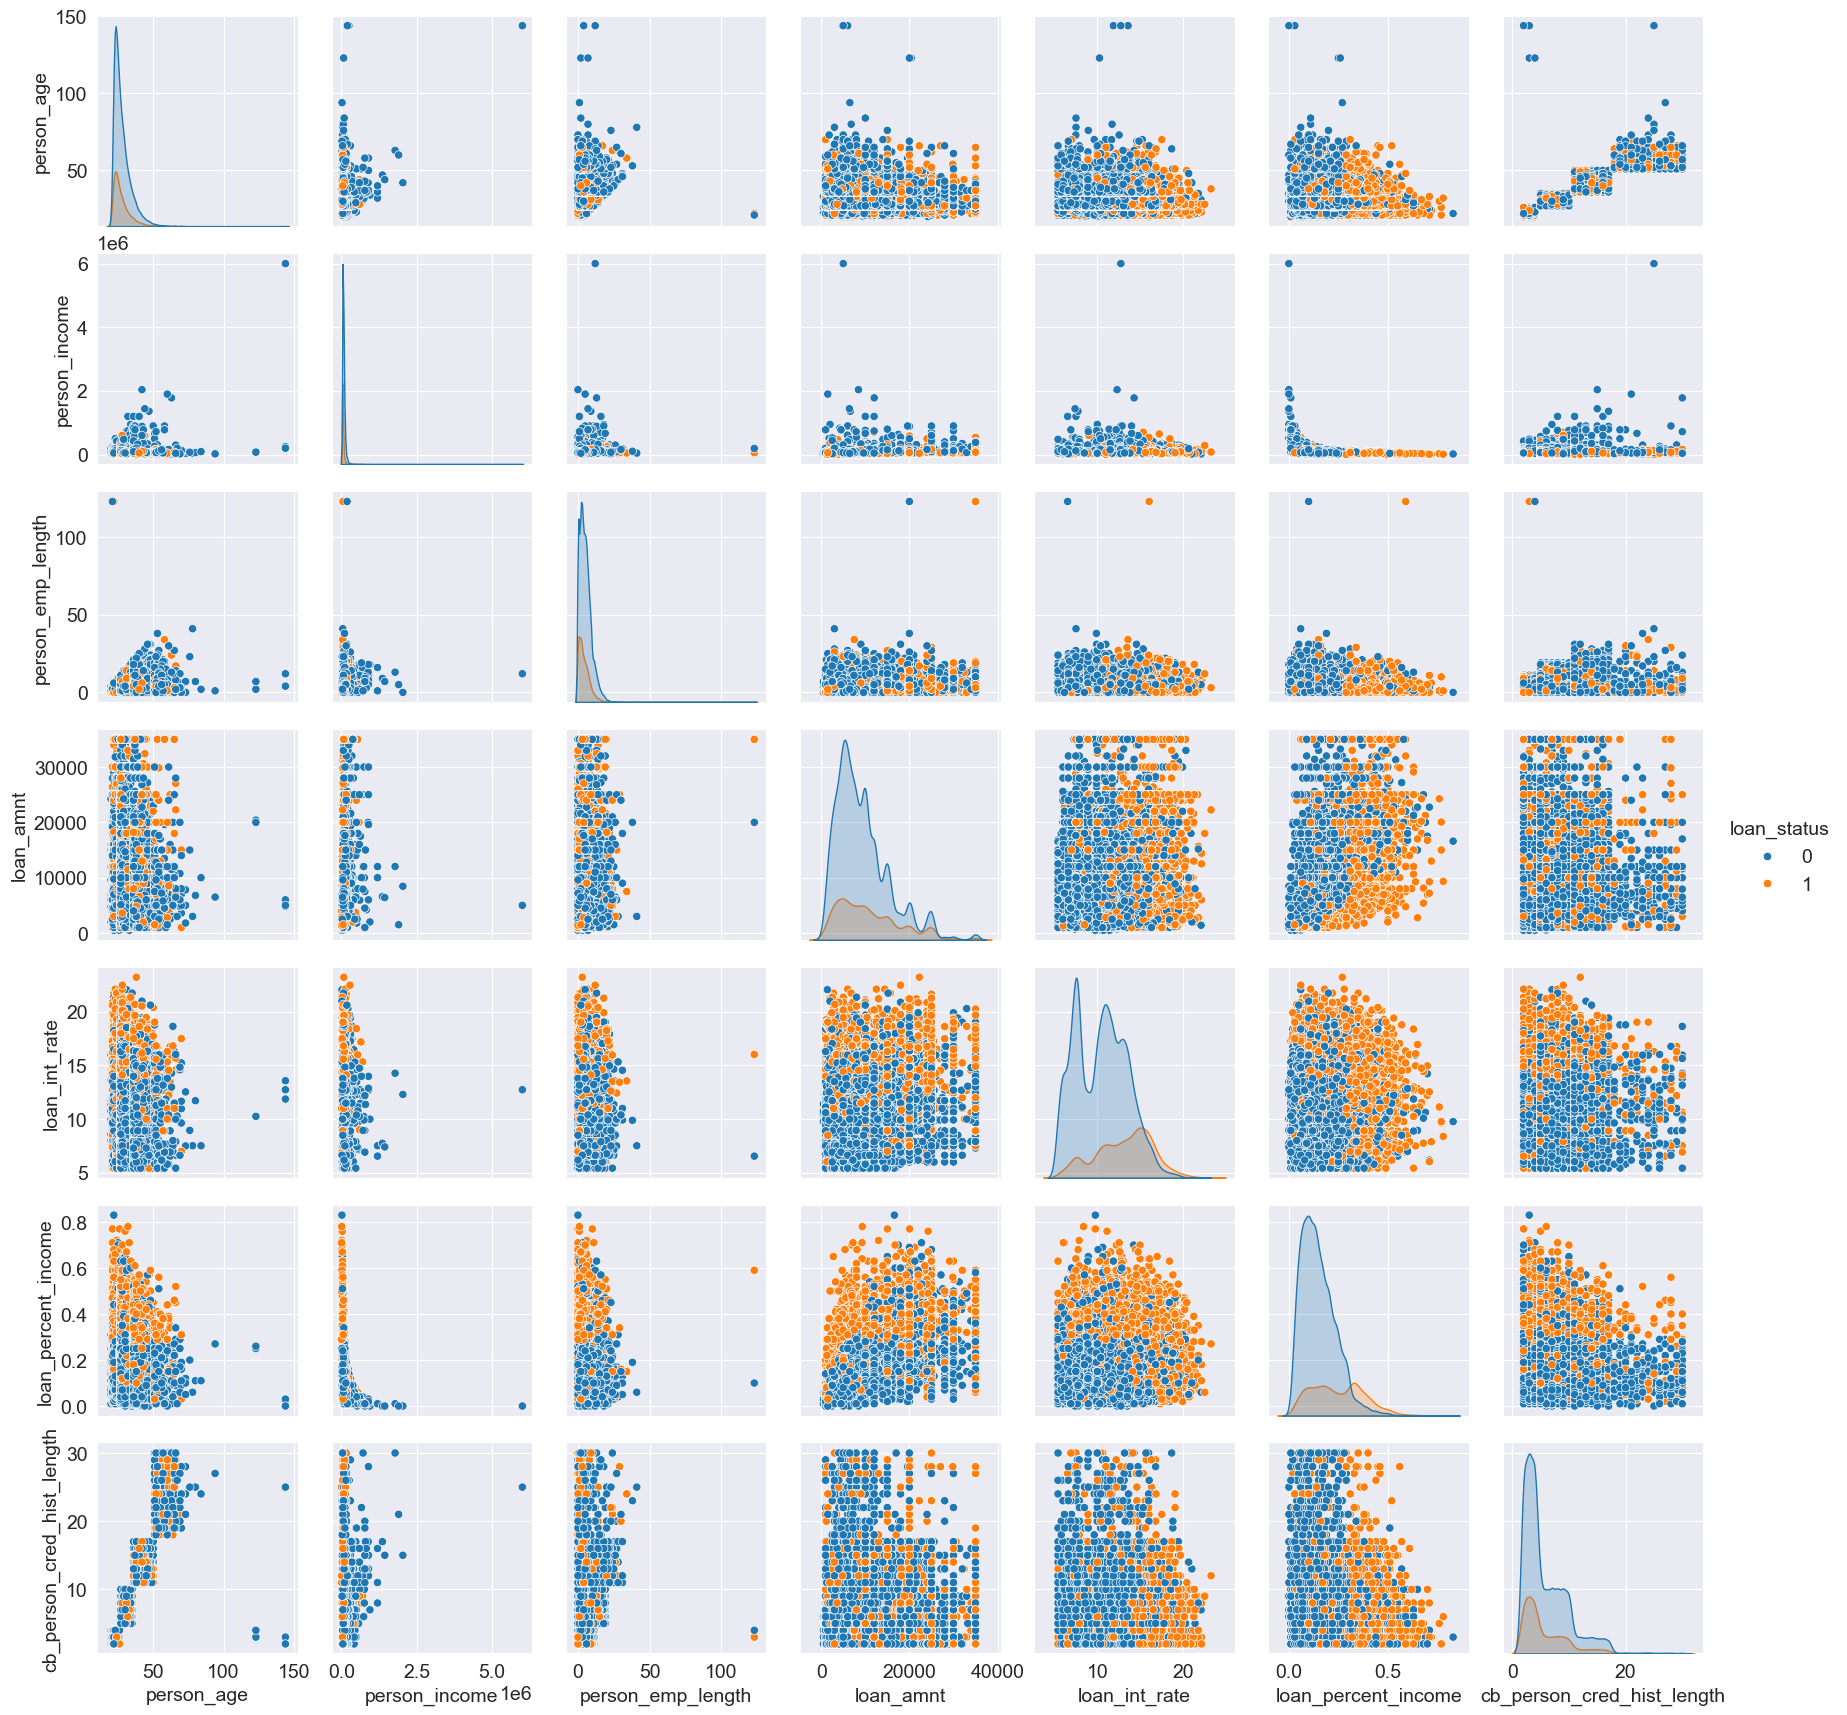

In [26]:
sns.pairplot(data,hue="loan_status")

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">4. Dealing with Outliers</div>

In [27]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [28]:
# drop values that are null
data.dropna(axis=0,inplace=True)

In [29]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [30]:
data['loan_status'].value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

In [31]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  28638.000000   2.863800e+04       28638.000000  28638.000000   
mean      27.727216   6.664937e+04           4.788672   9656.493121   
std        6.310441   6.235645e+04           4.154627   6329.683361   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.948000e+04           2.000000   5000.000000   
50%       26.000000   5.595600e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28638.000000  28638.000000         28638.000000   
mean       11.039867      0.216600             0.169488   
std         3.229372      0.411935             0.106393   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                28638.000000  
mean                     5.793736  
std                      4.038483  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [32]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)

<BarContainer object of 57 artists>

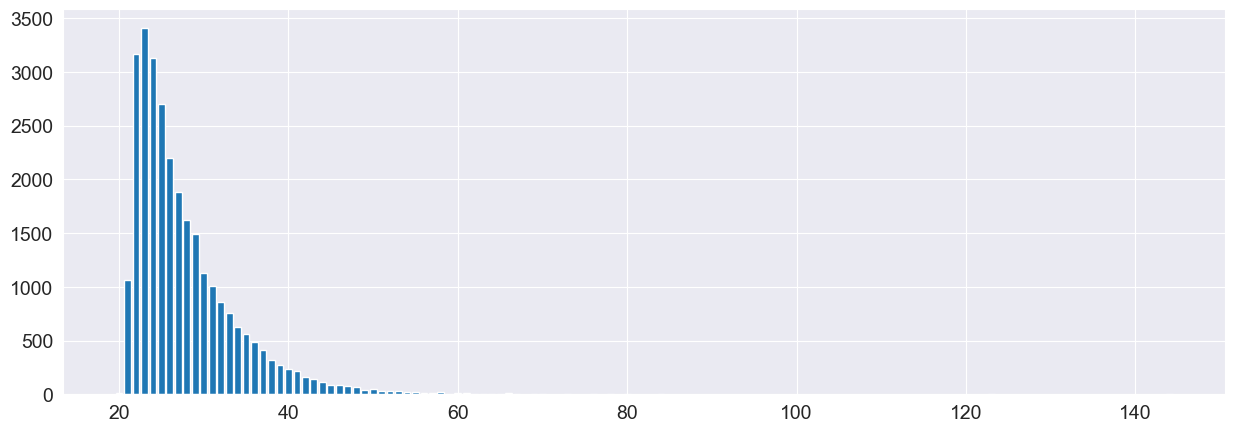

In [33]:
import matplotlib.pyplot as plt 
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [34]:
(data['person_age'].value_counts().values>90).sum()
# dropping rows that have age greater than 90

25

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">5. Feature Engineering</div>

In [35]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80

In [36]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [37]:
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True, categories_dtype=object)

In [38]:
data.head()

index  person_age  person_income person_home_ownership  person_emp_length  \
0      0          22          59000                  RENT              123.0   
1      1          21           9600                   OWN                5.0   
2      2          25           9600              MORTGAGE                1.0   
3      3          23          65500                  RENT                4.0   
4      4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.59                         Y                           3   
1                 0.10                         N                           2   
2                 0.57                         N                           3   
3                 0.53                         N                           2   
4                 0.55                         Y                           4   

  age_group  
0     20-25  
1     20-25  
2     20-25  
3     20-25  
4     20-25

## **Income Group**

In [39]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [40]:
data['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
28633         middle
28634           high
28635    high-middle
28636           high
28637     low-middle
Name: income_group, Length: 28633, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

In [41]:
data.head()

index  person_age  person_income person_home_ownership  person_emp_length  \
0      0          22          59000                  RENT              123.0   
1      1          21           9600                   OWN                5.0   
2      2          25           9600              MORTGAGE                1.0   
3      3          23          65500                  RENT                4.0   
4      4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.59                         Y                           3   
1                 0.10                         N                           2   
2                 0.57                         N                           3   
3                 0.53                         N                           2   
4                 0.55                         Y                           4   

  age_group income_group  
0     20-25       middle  
1     20-25          low  
2     20-25          low  
3     20-25       middle  
4     20-25       middle

## **Loan Amount**

In [42]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [43]:
data['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
28633        medium
28634    very large
28635    very large
28636         large
28637        medium
Name: loan_amount_group, Length: 28633, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [44]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [45]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)

In [46]:
data['person_home_ownership'].value_counts()


person_home_ownership
RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: count, dtype: int64

In [47]:
data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          21           9600                   OWN                5.0   
1          25           9600              MORTGAGE                1.0   
2          23          65500                  RENT                4.0   
3          24          54400                  RENT                8.0   
4          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0   EDUCATION          B       1000          11.14            0   
1     MEDICAL          C       5500          12.87            1   
2     MEDICAL          C      35000          15.23            1   
3     MEDICAL          C      35000          14.27            1   
4     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.10                         N                           2   
1                 0.57                         N                           3   
2                 0.53                         N                           2   
3                 0.55                         Y                           4   
4                 0.25                         N                           2   

  age_group income_group loan_amount_group  
0     20-25          low             small  
1     20-25          low            medium  
2     20-25       middle        very large  
3     20-25       middle        very large  
4     20-25          low             small

In [48]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt'] 

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [49]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [50]:
raw_data = data.copy()

In [51]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [52]:
data = data.drop(drop_colums, axis=1)

In [53]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">6. Data Preprocessing</div> 


In [54]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)


In [56]:
print(x_train.shape,x_test.shape)

(22904, 17) (5727, 17)


In [57]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [58]:
x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [59]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])

OneHotEncoder()

In [60]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [61]:
merge_ohe_col = np.concatenate((ohe.categories_[0], 
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],))

In [62]:
merge_ohe_col

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high-middle', 'low',
       'low-middle', 'middle', '20-25', '26-35', '36-45', '46-55',
       '56-65', nan, 'large', 'medium', 'small', 'very large'],
      dtype=object)

In [63]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col)

In [64]:

X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)


In [65]:
X_new.head()
X_new.shape

(22904, 45)

In [66]:
X_new_test.head()


N    Y    A    B    C    D    E    F    G  MORTGAGE  ...  person_age  \
0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0  ...          35   
1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0       0.0  ...          35   
2  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0       0.0  ...          32   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0       0.0  ...          25   
4  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0       0.0  ...          32   

   person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          66000                4.0       3000           6.03   
1          33144                3.0       8400          14.91   
2          36000                4.0       6000          16.07   
3          61500                1.0      18000          13.23   
4          24000                7.0       2800          10.99   

   loan_percent_income  cb_person_cred_hist_length  loan_to_income_ratio  \
0                 0.05                           7              0.045455   
1                 0.25                           8              0.253440   
2                 0.17                          10              0.166667   
3                 0.29                           2              0.292683   
4                 0.12                           9              0.116667   

   loan_to_emp_length_ratio  int_rate_to_loan_amt_ratio  
0                  0.001333                    0.002010  
1                  0.000357                    0.001775  
2                  0.000667                    0.002678  
3                  0.000056                    0.000735  
4                  0.002500                    0.003925  

[5 rows x 45 columns]

In [67]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

bimodal_col = []


scaler_uniform = MinMaxScaler()
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

scaler_bimodal = RobustScaler()
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

In [68]:
X_new_test.head()

N    Y    A    B    C    D    E    F    G  MORTGAGE  ...  person_age  \
0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0  ...    1.181707   
1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0       0.0  ...    1.181707   
2  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0       0.0  ...    0.695186   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0       0.0  ...   -0.440030   
4  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0       0.0  ...    0.695186   

   person_income  person_emp_length  loan_amnt  loan_int_rate  \
0      -0.006231          -0.192831  -1.052710      -1.556377   
1      -0.655354          -0.440648  -0.197407       1.195223   
2      -0.598929          -0.192831  -0.577541       1.554667   
3      -0.095136          -0.936282   1.323133       0.674650   
4      -0.836009           0.550621  -1.084388      -0.019447   

   loan_percent_income  cb_person_cred_hist_length  loan_to_income_ratio  \
0            -1.123388                    0.296643              0.045455   
1             0.757473                    0.543970              0.253440   
2             0.005128                    1.038624              0.166667   
3             1.133645                   -0.939991              0.292683   
4            -0.465087                    0.791297              0.116667   

   loan_to_emp_length_ratio  int_rate_to_loan_amt_ratio  
0                  0.530868                    0.076675  
1                 -0.380924                   -0.049526  
2                 -0.091820                    0.435586  
3                 -0.662616                   -0.608033  
4                  1.620571                    1.105078  

[5 rows x 45 columns]

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">7. ML Classification Models</div> 


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

Defaulting to user installation because normal site-packages is not writeable


In [74]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0) 
lgb = lgb.LGBMClassifier() 



In [75]:
clf = {
    'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [ ]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [76]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity

# Usage
# accuracy, precision, recall, specificity = train_classifier(clf, x_train, y_train, X_test, y_test)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)


In [77]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)


In [78]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)
    

For  KN
Accuracy -  0.7943076654443862
Precision -  0.5565068493150684
Recall -  0.2612540192926045
Specificity -  0.9422261878206558

For  xgb
Accuracy -  0.9432512659332984
Precision -  0.970317297850563
Recall -  0.7620578778135049
Specificity -  0.9935311175552086

For  cat
Accuracy -  0.9444735463593504
Precision -  0.9863445378151261
Recall -  0.7548231511254019
Specificity -  0.9971001561454383

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4958, number of negative: 17946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 22904, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216469 -> initscore=-1.286365
[LightGBM] 

In the context of loan default prediction, two key factors come into play: the potential financial impact of missed loan defaults and the risk of denying loans to trustworthy applicants.

1- Recall (Sensitivity): Recall measures how well the model identifies actual loan defaults. For lenders, missing a loan that eventually defaults can lead to significant financial losses. Thus, achieving a high Recall is essential because it ensures that most potential default cases are detected, minimizing the risk of financial setbacks.

2- Specificity: Specificity gauges the model's accuracy in identifying loans that won't default. Misclassifying a reliable borrower as a potential defaulter (false positive) can result in lost business opportunities. By emphasizing high Specificity, the model aims to avoid misclassifications that could deny loans to credible applicants.

3- Precision: Precision is a key metric as it evaluates the accuracy of positive predictions. Lenders need to avoid false positives (incorrectly predicting defaults) to prevent unwarranted actions. Maintaining high Precision ensures that when the model predicts a default, it's highly likely to be accurate. This protects the lender from unnecessary costs and safeguards borrower relationships.

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">8. Hyperparameter Tuning</div>

In [79]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree
    
    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             X_new, y_train, scoring='recall', cv=10).mean()
    return scores

# Set parameters distribution
params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

|   iter    |  target   | num_le... | max_depth | learni... | min_ch... | subsample | colsam... |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4462, number of negative: 16151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2010
[LightGBM] [Info] Number of data points in the train set: 20613, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216465 -> initscore=-1.286385
[LightGBM] [Info] Start training from score -1.286385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [80]:
# Best hyperparameters
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm

{'num_leaves': 922,
 'max_depth': 10,
 'learning_rate': 0.3,
 'min_child_weight': 0.1,
 'subsample': 0.9822884553695382,
 'colsample_bytree': 0.9540510901888192}

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">9. Training Final Model</div> 


In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


knn = KNeighborsClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('lgb', lgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4958, number of negative: 17946
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 22904, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216469 -> initscore=-1.286365
[LightGBM] [Info] Start training from score -1.286365
For ensemble
Accuracy -  0.9360921948664223
Precision -  0.9943693693693694
Recall -  0.7098070739549839
Specificity -  0.9988846754405531


In [82]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.feature_selection import RFE

clf = RandomForestRegressor()


clf.fit(X_new,y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)
feature_scores

loan_to_income_ratio          0.233639
loan_int_rate                 0.154820
RENT                          0.124640
person_income                 0.100322
index                         0.047404
person_emp_length             0.037516
MEDICAL                       0.032452
int_rate_to_loan_amt_ratio    0.031301
loan_to_emp_length_ratio      0.028918
DEBTCONSOLIDATION             0.028844
person_age                    0.026337
C                             0.025621
loan_percent_income           0.018375
D                             0.017747
cb_person_cred_hist_length    0.014598
loan_amnt                     0.014222
HOMEIMPROVEMENT               0.010953
OWN                           0.010209
MORTGAGE                      0.005238
EDUCATION                     0.004404
PERSONAL                      0.003974
VENTURE                       0.003577
G                             0.003253
N                             0.002128
Y                             0.002085
26-35                    

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">10. Auto ML using PyCaret</div>

[image.png](attachment:43d16c7c-325d-471d-b961-1494fc388503.png)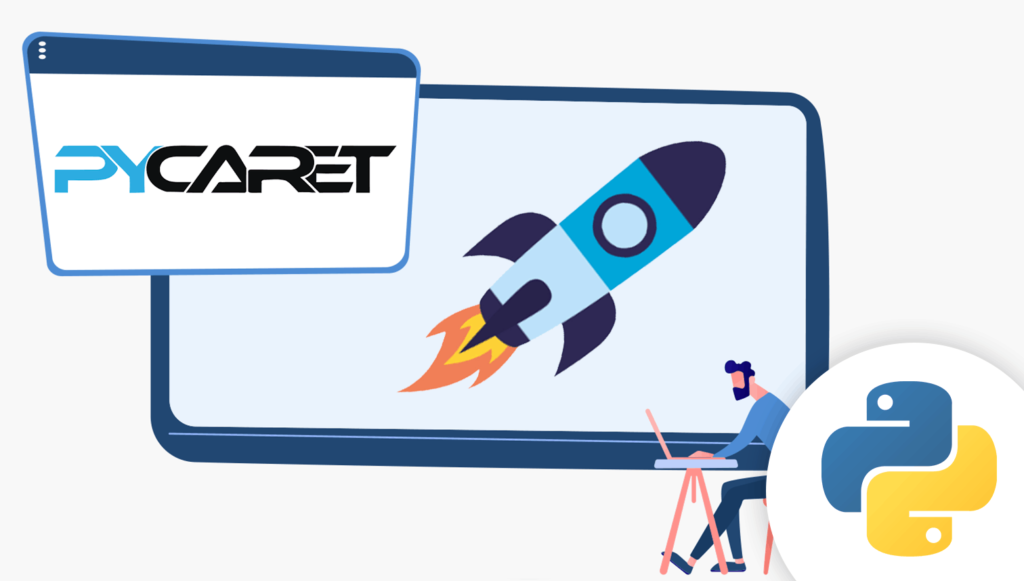

In [83]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pmdarima to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   --------- ------------------------------ 5.0/21.8 MB 25.2 MB/s eta 0:00:01
   -------------------- ------------------- 11.0/21.8 MB 26.5 MB/s eta 0:00:01
   ------------------------------- -------- 17.0/21.8 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------- 21.8/21.8 MB 27.0 MB/s  0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   -------------------------------- ------- 6.0/7.5 MB 28.4 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 25.7 MB/s  0:00:00
   ------------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [90]:
from pycaret.classification import setup, compare_models, evaluate_model, predict_model, save_model


RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

In [87]:
raw_data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          21           9600                   OWN                5.0   
1          25           9600              MORTGAGE                1.0   
2          23          65500                  RENT                4.0   
3          24          54400                  RENT                8.0   
4          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0   EDUCATION          B       1000          11.14            0   
1     MEDICAL          C       5500          12.87            1   
2     MEDICAL          C      35000          15.23            1   
3     MEDICAL          C      35000          14.27            1   
4     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.10                         N                           2   
1                 0.57                         N                           3   
2                 0.53                         N                           2   
3                 0.55                         Y                           4   
4                 0.25                         N                           2   

  age_group income_group loan_amount_group  loan_to_income_ratio  \
0     20-25          low             small              0.104167   
1     20-25          low            medium              0.572917   
2     20-25       middle        very large              0.534351   
3     20-25       middle        very large              0.643382   
4     20-25          low             small              0.252525   

   loan_to_emp_length_ratio  int_rate_to_loan_amt_ratio  
0                  0.005000                    0.011140  
1                  0.000182                    0.002340  
2                  0.000114                    0.000435  
3                  0.000229                    0.000408  
4                  0.000800                    0.002856

In [88]:
model = setup(data = raw_data, target = 'loan_status', session_id=123) 

NameError: name 'setup' is not defined

In [ ]:
compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
model = setup(data = data_original, target = 'loan_status', session_id=123) 

In [ ]:
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pred_holdout = predict_model(best)

In [ ]:
# save pipeline
save_model(best, 'my_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['person_age', 'person_income',
                                              'person_emp_length', 'loan_amnt',
                                              'loan_int_rate',
                                              'loan_percent_income',
                                              'cb_person_cred_hist_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missi...
                                     include=['person_home_ownership',
                      

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">11. Auto ML using AutoGluon</div>

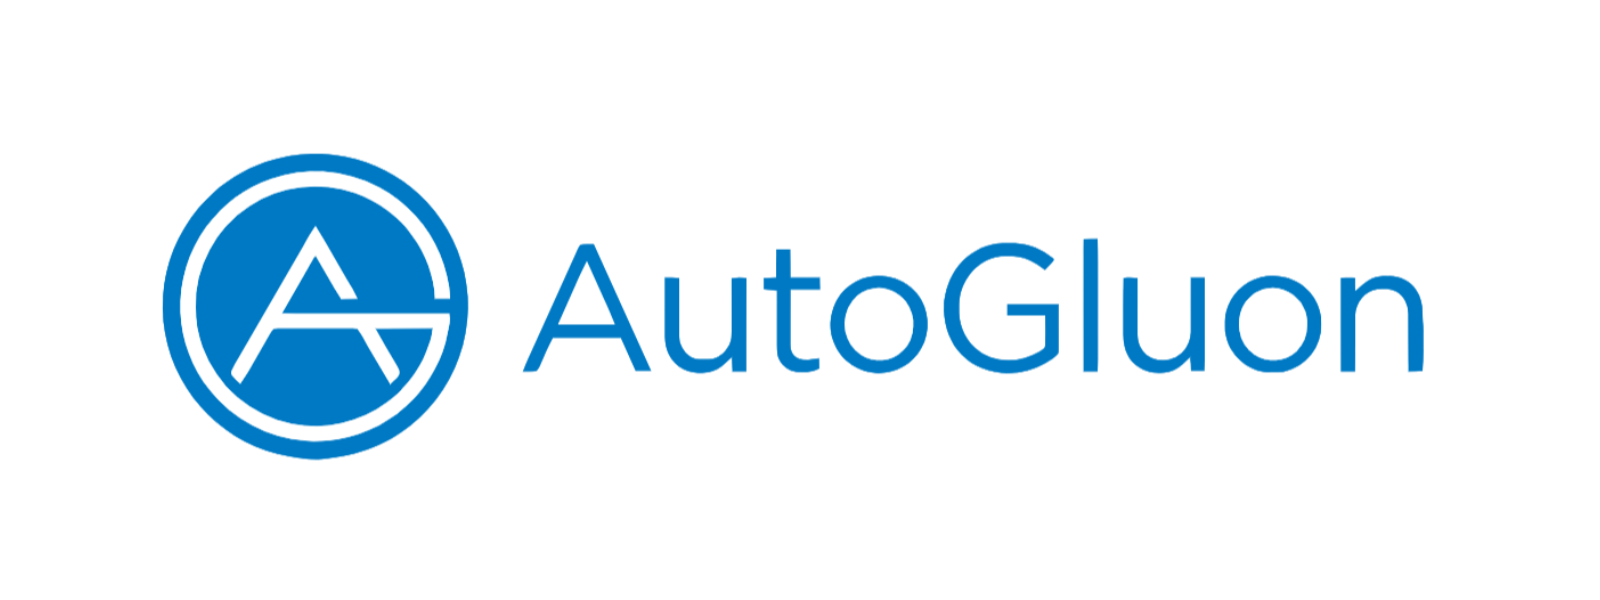

In [89]:
!pip install autogluon

^C


In [ ]:
from sklearn.model_selection import train_test_split

#split dataframe into train and test sets
train, test = train_test_split(data, test_size=0.2,random_state=12)

#print size of each set
print(train.shape, test.shape)


(22904, 18) (5727, 18)


In [ ]:
train.head()

person_age  person_income person_home_ownership  person_emp_length  \
8981           23          66000              MORTGAGE                5.0   
27638          44          95000              MORTGAGE                4.0   
2128           25          32004              MORTGAGE                3.0   
25179          34          90000              MORTGAGE               19.0   
5763           23          50000              MORTGAGE                6.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
8981      VENTURE          A       6000           6.62            0   
27638     VENTURE          B      10000          10.95            0   
2128     PERSONAL          A      22750           6.17            0   
25179     VENTURE          C       5000          13.61            0   
5763      VENTURE          A       7000           5.99            0   

       loan_percent_income cb_person_default_on_file  \
8981                  0.09                         N   
27638                 0.11                         N   
2128                  0.71                         N   
25179                 0.06                         Y   
5763                  0.14                         N   

       cb_person_cred_hist_length age_group income_group loan_amount_group  \
8981                            2     20-25       middle            medium   
27638                          15     36-45  high-middle            medium   
2128                            4     20-25   low-middle        very large   
25179                           8     26-35  high-middle             small   
5763                            3     20-25   low-middle            medium   

       loan_to_income_ratio  loan_to_emp_length_ratio  \
8981               0.090909                  0.000833   
27638              0.105263                  0.000400   
2128               0.710849                  0.000132   
25179              0.055556                  0.003800   
5763               0.140000                  0.000857   

       int_rate_to_loan_amt_ratio  
8981                     0.001103  
27638                    0.001095  
2128                     0.000271  
25179                    0.002722  
5763                     0.000856

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor



predictor = TabularPredictor(label='loan_status').fit(train_data=train)
predictions = predictor.predict(test)

No path specified. Models will be saved in: "AutogluonModels/ag-20230824_035217/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230824_035217/"
AutoGluon Version:  0.8.2
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Aug 19 11:00:11 UTC 2023
Disk Space Avail:   20.93 GB / 20.96 GB (99.9%)
Train Data Rows:    22904
Train Data Columns: 17
Label Column: loan_status
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:

In [ ]:
predictor.evaluate(test, silent=True)

{'accuracy': 0.9359175833769862,
 'balanced_accuracy': 0.8551055326553403,
 'mcc': 0.8065049060839535,
 'roc_auc': 0.9407888177774846,
 'f1': 0.828424497428705,
 'precision': 0.9899441340782122,
 'recall': 0.7122186495176849}

In [ ]:
predictor.leaderboard(test, silent=True)

model  score_test  score_val  pred_time_test  pred_time_val  \
0   WeightedEnsemble_L2    0.935918   0.931471        0.137792       0.077305   
1              CatBoost    0.935743   0.929725        0.017009       0.017721   
2               XGBoost    0.935743   0.928416        0.039158       0.022773   
3         LightGBMLarge    0.935045   0.928852        0.028564       0.016615   
4              LightGBM    0.934171   0.930162        0.021694       0.014485   
5            LightGBMXT    0.931552   0.926233        0.095200       0.040856   
6      RandomForestEntr    0.929806   0.924051        0.347751       0.158012   
7       NeuralNetFastAI    0.929632   0.925360        0.140897       0.058506   
8      RandomForestGini    0.928584   0.921432        0.354544       0.160911   
9        NeuralNetTorch    0.922298   0.915757        0.068536       0.040157   
10       ExtraTreesEntr    0.921425   0.915321        0.446655       0.192758   
11       ExtraTreesGini    0.920901   0.915757        0.428823       0.218269   
12       KNeighborsDist    0.835516   0.835443        0.022274       0.014091   
13       KNeighborsUnif    0.830278   0.824531        0.047066       0.023440   

     fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0   16.102642                 0.003889                0.004243   
1    9.904861                 0.017009                0.017721   
2    1.845425                 0.039158                0.022773   
3    4.181750                 0.028564                0.016615   
4    1.806099                 0.021694                0.014485   
5    3.100272                 0.095200                0.040856   
6   14.002217                 0.347751                0.158012   
7   37.681989                 0.140897                0.058506   
8   13.517762                 0.354544                0.160911   
9   84.645669                 0.068536                0.040157   
10   5.668272                 0.446655                0.192758   
11   5.392989                 0.428823                0.218269   
12   0.020500                 0.022274                0.014091   
13   1.408793                 0.047066                0.023440   

    fit_time_marginal  stack_level  can_infer  fit_order  
0            1.291409            2       True         14  
1            9.904861            1       True          7  
2            1.845425            1       True         11  
3            4.181750            1       True         13  
4            1.806099            1       True          4  
5            3.100272            1       True          3  
6           14.002217            1       True          6  
7           37.681989            1       True         10  
8           13.517762            1       True          5  
9           84.645669            1       True         12  
10           5.668272            1       True          9  
11           5.392989            1       True          8  
12           0.020500            1       True          2  
13           1.408793            1       True          1

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">12. Author's Message</div>

## <div style="border-radius:10px; border:#3eb489 ; padding: 40px; background-color: #ddefdd; font-size:100%; text-align:center">If you liked this Notebook, please do upvote.<br><br>If you have any questions, feel free to comment!</div>

<div style="background-color: #f5fff5; padding: 0px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <img src="https://www.creativefabrica.com/wp-content/uploads/2019/11/01/1572599594/Thank-you-for-your-support-580x386.jpg"  style="width: 600px; margin: 50px auto;">
</div>

